<a href="https://colab.research.google.com/github/Skevrek/MBA_Thesis/blob/main/V2LinearRegressionSemis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-1M.xlsx")

In [3]:
df.tail(5)

,Date,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
344,2022-09-01,4.039924,4.036574,4.905679,4.125520,4.115780,5.971007,3.837299,4.799914,0.237914,4.987708,4.608036
345,2022-10-01,4.048527,4.039924,4.897674,4.127134,4.115780,5.968196,3.845883,4.799091,0.216884,4.988390,4.607506
346,2022-11-01,4.052446,4.048527,4.982745,4.117410,4.120662,5.972282,3.828641,4.799914,0.186065,4.989752,4.610189
347,2022-12-01,4.053141,4.052446,4.776836,4.109233,4.120662,5.974827,3.808882,4.800737,0.161779,4.991113,4.604340
348,2023-01-01,4.045749,4.053141,4.734916,4.100989,4.120662,5.976351,3.806662,4.805659,0.139936,4.993828,4.586698


In [4]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [5]:
cdf_1M = df[['PPI','PPI_Lagged']]

In [6]:
cdf_1M

,PPI,PPI_Lagged
0,4.656813,4.656813
1,4.657763,4.656813
2,4.657763,4.657763
3,4.658711,4.657763
4,4.657763,4.658711
...,...,...
344,4.039924,4.036574
345,4.048527,4.039924
346,4.052446,4.048527
347,4.053141,4.052446


In [7]:
# # Visualize the training data
# plt.scatter(train.PPI_FirstLag, train.PPI, color='blue')
# plt.xlabel("PPI First LAG")
# plt.ylabel("PPI")
# plt.show()
# # Plot the trained model
# plt.scatter(train.PPI_FirstLag, train.PPI, color='blue')
# plt.plot(train_x, regr.predict(train_x), '-r')
# plt.xlabel("PPI First LAG")
# plt.ylabel("PPI")

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_1M) * 0.7)

# Split the data into training and testing sets
train = cdf_1M[:last_entry]
test = cdf_1M[last_entry:]

# Train the model using Ridge regression
alpha = 0.05
regr = Ridge(alpha=alpha)
train_x = np.asanyarray(train.drop(['PPI'], axis=1))
train_y = np.asanyarray(train[['PPI']])
regr.fit(train_x, train_y)

# The coefficients
print ('Intercept: %.8f' % regr.intercept_)
print ('Coefficients: ', regr.coef_)

# Evaluate the model on the testing data
test_x = np.asanyarray(test.drop(['PPI'], axis=1))
test_y = np.asanyarray(test[['PPI']])
test_y_ = regr.predict(test_x)



print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))


Intercept: 0.02616271
Coefficients:  [[0.99345567]]
Mean absolute error: 0.00286480
Mean squared error: 0.00001875
R2-score: 0.96975371


In [9]:
train_y_pred = regr.predict(train_x)
train_mape = np.mean(np.abs((train_y - train_y_pred) / train_y)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

test_mape = np.mean(np.abs((test_y - test_y_) / test_y)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

all_values = np.concatenate((test_y, test_y_), axis=1)
print(np.concatenate((test, all_values), axis=1))

Train MAPE: 0.08393432%
Test MAPE: 0.07112515%
[[4.07243973 4.07243973 4.07243973 4.07195104]
 [4.07243973 4.07243973 4.07243973 4.07195104]
 [4.07414185 4.07243973 4.07414185 4.07195104]
 [4.07243973 4.07414185 4.07243973 4.07364203]
 [4.07414185 4.07243973 4.07414185 4.07195104]
 [4.07414185 4.07414185 4.07414185 4.07364203]
 [4.07243973 4.07414185 4.07243973 4.07364203]
 [4.07243973 4.07243973 4.07243973 4.07195104]
 [4.07243973 4.07243973 4.07243973 4.07195104]
 [4.07243973 4.07243973 4.07243973 4.07195104]
 [4.0707347  4.07243973 4.0707347  4.07195104]
 [4.0707347  4.0707347  4.0707347  4.07025717]
 [4.07243973 4.0707347  4.07243973 4.07025717]
 [4.06560209 4.07243973 4.06560209 4.07195104]
 [4.06731589 4.06560209 4.06731589 4.06515816]
 [4.06388535 4.06731589 4.06388535 4.06686074]
 [4.06216566 4.06388535 4.06216566 4.06345265]
 [4.06216566 4.06216566 4.06216566 4.06174422]
 [4.06216566 4.06216566 4.06216566 4.06174422]
 [4.06044301 4.06216566 4.06044301 4.06174422]
 [4.05525717 

In [10]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.08393432%
Test MAPE: 0.07112515%


In [11]:
train_df

,PPI,PPI_pred,MAPE
0,4.656813,4.652500,0.000926
1,4.657763,4.652500,0.001130
2,4.657763,4.653443,0.000927
3,4.658711,4.653443,0.001131
4,4.657763,4.654386,0.000725
...,...,...,...
239,4.084294,4.083728,0.000139
240,4.075841,4.083728,0.001935
241,4.074142,4.075330,0.000292
242,4.074142,4.073642,0.000123


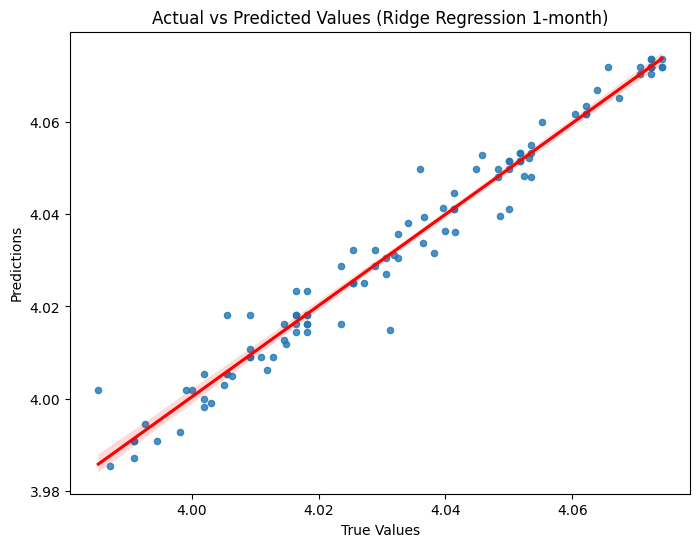

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (Ridge Regression 1-month)")
plt.show()

In [13]:
# all_values = pd.DataFrame({'Actual': np.ravel(test_y), 'Predicted': np.ravel(test_y_)}, index=test.index)
# print(all_values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


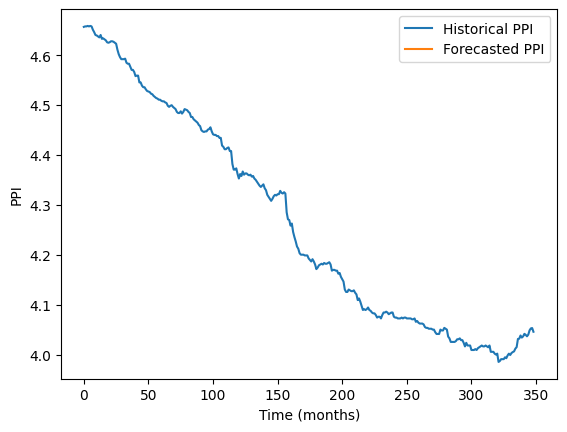

[[4.05277817]]


In [14]:
n_months = 1
# Create an array of lagged PPI values for the next n_months
X = cdf_1M[['PPI_Lagged']].tail(n_months)
y_pred = regr.predict(X)
forecast_df = pd.DataFrame(data=y_pred.ravel(), columns=['PPI'])

forecast_index = pd.date_range(start=cdf_1M.index[-1], periods=1, freq='MS')
forecast_df.set_index(forecast_index, inplace=True)



# Plot the predicted PPI values
plt.plot(range(len(cdf_1M)), cdf_1M['PPI'], label='Historical PPI')
plt.plot(range(len(cdf_1M), len(cdf_1M)+n_months), forecast_df, label='Forecasted PPI')
plt.xlabel('Time (months)')
plt.ylabel('PPI')
plt.legend()
plt.show()

print(forecast_df.values,sep="\n")

**Forecast For 3 Months**

In [15]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-3M.xlsx")

In [16]:
df.tail(5)

,Date,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
342,2022-09-01,4.039924,4.041576,4.904500,4.117410,4.122284,5.956614,3.860730,4.797442,0.274445,4.980176,4.606434
343,2022-10-01,4.048527,4.039607,4.779006,4.117410,4.119037,5.963579,3.856510,4.799914,0.258511,4.987025,4.608073
344,2022-11-01,4.052446,4.036574,4.905679,4.125520,4.115780,5.971007,3.837299,4.799914,0.237914,4.987708,4.608036
345,2022-12-01,4.053141,4.039924,4.897674,4.127134,4.115780,5.968196,3.845883,4.799091,0.216884,4.988390,4.607506
346,2023-01-01,4.045749,4.048527,4.982745,4.117410,4.120662,5.972282,3.828641,4.799914,0.186065,4.989752,4.610189


In [17]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [18]:
cdf_3M = df[['PPI','PPI_Lagged']]

In [19]:
# # Visualize the training data
# plt.scatter(train.PPI_FirstLag, train.PPI, color='blue')
# plt.xlabel("PPI First LAG")
# plt.ylabel("PPI")
# plt.show()
# # Plot the trained model
# plt.scatter(train.PPI_FirstLag, train.PPI, color='blue')
# plt.plot(train_x, regr.predict(train_x), '-r')
# plt.xlabel("PPI First LAG")
# plt.ylabel("PPI")

In [20]:
len(cdf_3M)

347

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_3M) * 0.7)

# Split the data into training and testing sets
train = cdf_3M[:last_entry]
test = cdf_3M[last_entry:]


# Train the model using Ridge regression
alpha = 0.05
regr = Ridge(alpha=alpha)
train_x = np.asanyarray(train.drop(['PPI'], axis=1))
train_y = np.asanyarray(train[['PPI']])
regr.fit(train_x, train_y)

# The coefficients
print ('Intercept: %.8f' % regr.intercept_)
print ('Coefficients: ', regr.coef_)

# Evaluate the model on the testing data
test_x = np.asanyarray(test.drop(['PPI'], axis=1))
test_y = np.asanyarray(test[['PPI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))

Intercept: 0.02852013
Coefficients:  [[0.99181097]]
Mean absolute error: 0.00684464
Mean squared error: 0.00007679
R2-score: 0.87609474


In [22]:
train_y_pred = regr.predict(train_x)
train_mape = np.mean(np.abs((train_y - train_y_pred) / train_y)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

test_mape = np.mean(np.abs((test_y - test_y_) / test_y)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

all_values = np.concatenate((test_y, test_y_), axis=1)
print(np.concatenate((test, all_values), axis=1))

Train MAPE: 0.16289184%
Test MAPE: 0.16986620%
[[4.07243973 4.07414185 4.07243973 4.06929873]
 [4.07243973 4.07414185 4.07243973 4.06929873]
 [4.07414185 4.07243973 4.07414185 4.06761054]
 [4.07243973 4.07243973 4.07243973 4.06761054]
 [4.07414185 4.07243973 4.07414185 4.06761054]
 [4.07414185 4.07414185 4.07414185 4.06929873]
 [4.07243973 4.07243973 4.07243973 4.06761054]
 [4.07243973 4.07414185 4.07243973 4.06929873]
 [4.07243973 4.07414185 4.07243973 4.06929873]
 [4.07243973 4.07243973 4.07243973 4.06761054]
 [4.0707347  4.07243973 4.0707347  4.06761054]
 [4.0707347  4.07243973 4.0707347  4.06761054]
 [4.07243973 4.07243973 4.07243973 4.06761054]
 [4.06560209 4.0707347  4.06560209 4.06591947]
 [4.06731589 4.0707347  4.06731589 4.06591947]
 [4.06388535 4.07243973 4.06388535 4.06761054]
 [4.06216566 4.06560209 4.06216566 4.0608289 ]
 [4.06216566 4.06731589 4.06216566 4.06252866]
 [4.06216566 4.06388535 4.06216566 4.05912622]
 [4.06044301 4.06216566 4.06044301 4.05742061]
 [4.05525717 

In [23]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.16289184%
Test MAPE: 0.16986620%


In [24]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.069299,0.000771
1,4.072440,4.069299,0.000771
2,4.074142,4.067611,0.001603
3,4.072440,4.067611,0.001186
4,4.074142,4.067611,0.001603
...,...,...,...
100,4.039924,4.037000,0.000724
101,4.048527,4.035046,0.003330
102,4.052446,4.032039,0.005036
103,4.053141,4.035361,0.004387


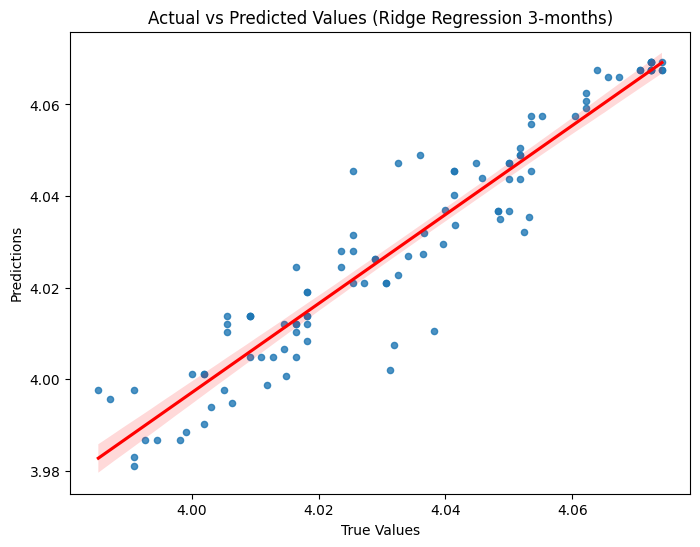

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (Ridge Regression 3-months)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


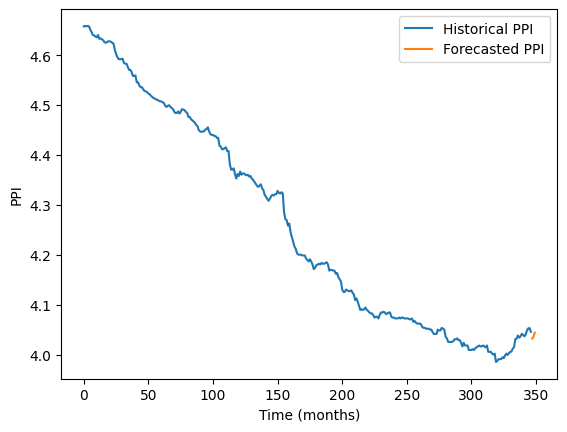

[[4.03203872]
 [4.03536067]
 [4.04389411]]


In [26]:
n_months = 3
# Create an array of lagged PPI values for the next n_months
X = cdf_3M[['PPI_Lagged']].tail(n_months)
y_pred = regr.predict(X)
forecast_df = pd.DataFrame(data=y_pred.ravel(), columns=['PPI'])

forecast_index = pd.date_range(start=cdf_3M.index[-1], periods=3, freq='MS')
forecast_df.set_index(forecast_index, inplace=True)



# Plot the predicted PPI values
plt.plot(range(len(cdf_3M)), cdf_3M['PPI'], label='Historical PPI')
plt.plot(range(len(cdf_3M), len(cdf_3M)+n_months), forecast_df, label='Forecasted PPI')
plt.xlabel('Time (months)')
plt.ylabel('PPI')
plt.legend()
plt.show()

print(forecast_df.values,sep="\n")

**Forecast for 6 months**

In [27]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-6M.xlsx")

In [28]:
df.tail(5)

,Date,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
339,2022-09-01,4.039924,4.038233,5.785128,4.119037,4.085976,5.938327,3.848018,4.790820,0.342738,4.969813,4.614697
340,2022-10-01,4.048527,4.034028,5.271923,4.123903,4.096010,5.945159,3.862833,4.794964,0.292296,4.976044,4.618786
341,2022-11-01,4.052446,4.036433,4.974446,4.120662,4.109233,5.951423,3.862833,4.797442,0.274445,4.978801,4.614332
342,2022-12-01,4.053141,4.041576,4.904500,4.117410,4.122284,5.956614,3.860730,4.797442,0.274445,4.980176,4.606434
343,2023-01-01,4.045749,4.039607,4.779006,4.117410,4.119037,5.963579,3.856510,4.799914,0.258511,4.987025,4.608073


In [29]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [30]:
cdf_6M = df[['PPI','PPI_Lagged','Export_Semis','Employees_Semis', 'Import_Semis']]

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_6M) * 0.7)

# Split the data into training and testing sets
train = cdf_6M[:last_entry]
test = cdf_6M[last_entry:]

train_x = np.asanyarray(train.drop(['PPI'], axis=1))
train_y = np.asanyarray(train[['PPI']])
test_x = np.asanyarray(test.drop(['PPI'], axis=1))
test_y = np.asanyarray(test[['PPI']])

# Initialize best R2 score to a very small value
best_r2_score = -float('inf')
best_y_pred = -float('inf')
# Try different values of n_estimators
n_ridge_list = [0.01,0.05,0.1,1,10,100]

for n_ridge in n_ridge_list:
  regr = Ridge(alpha=n_ridge)

  regr.fit(train_x, train_y)
  # Make predictions on test set
  y_pred = regr.predict(test_x)

  # Calculate evaluation metrics
  mae = mean_absolute_error(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  r2 = r2_score(test_y, y_pred)



  # Check if current R2 score is better than the best so far
  if r2 > best_r2_score:
      best_r2_score = r2
      best_n_ridge = n_ridge
      best_y_pred = y_pred

  # Print evaluation metrics
  print(f'Linear Regression with {n_ridge} ridge')
  print('Intercept: %.8f' % regr.intercept_)
  print('Coefficients: ', regr.coef_)
  print('Linear Regression MAE:', mae)
  print('Linear Regression MSE:', mse)
  print('Linear Regression R2 score:', r2)
  print('\n')


#Train with the best Ridge
regr = Ridge(alpha=best_n_ridge)
regr.fit(train_x, train_y)
test_y_ = regr.predict(test_x)
print(f'Best Linear Regression with {best_n_ridge} ridge')
print('Linear Regression MAE:', mean_absolute_error(test_y, regr.predict(test_x)))
print('Linear Regression MSE:', mean_squared_error(test_y, regr.predict(test_x)))
print('Linear Regression R2 score:', best_r2_score)


Linear Regression with 0.01 ridge
Intercept: 0.11205718
Coefficients:  [[0.88785168 0.06037429 0.01421464 0.00135166]]
Linear Regression MAE: 0.009099997104979005
Linear Regression MSE: 0.00012915331778748547
Linear Regression R2 score: 0.7885072078546793


Linear Regression with 0.05 ridge
Intercept: 0.11988556
Coefficients:  [[0.77458862 0.05257586 0.0538758  0.06204377]]
Linear Regression MAE: 0.008723124837759584
Linear Regression MSE: 0.0001236881872435092
Linear Regression R2 score: 0.7974565382937632


Linear Regression with 0.1 ridge
Intercept: 0.13906421
Coefficients:  [[0.67912489 0.05225392 0.08469008 0.1078668 ]]
Linear Regression MAE: 0.009023020432927286
Linear Regression MSE: 0.0001353795130822221
Linear Regression R2 score: 0.7783116089348543


Linear Regression with 1 ridge
Intercept: 0.43398357
Coefficients:  [[0.3095879  0.13826124 0.16250604 0.207701  ]]
Linear Regression MAE: 0.030521941910681465
Linear Regression MSE: 0.0010851745253583648
Linear Regression R2 sco

In [32]:
len(test_y_)

104

In [33]:
train_y_pred = regr.predict(train_x)
train_mape = np.mean(np.abs((train_y - train_y_pred) / train_y)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

test_mape = np.mean(np.abs((test_y - test_y_) / test_y)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

all_values = np.concatenate((test_y, test_y_), axis=1)
print(np.concatenate((test, all_values), axis=1))

Train MAPE: 0.26688635%
Test MAPE: 0.21668750%
[[4.07243973 4.08429423 4.13516656 5.91781801 4.17899204 4.07243973
  4.07905094]
 [4.07414185 4.07584109 4.12552018 5.91296232 4.17438727 4.07414185
  4.07144877]
 [4.07243973 4.07414185 4.12713439 5.91215074 4.1713056  4.07243973
  4.06998251]
 [4.07414185 4.07414185 4.130355   5.90944071 4.17284762 4.07414185
  4.0701015 ]
 [4.07414185 4.07243973 4.12713439 5.90590666 4.17284762 4.07414185
  4.06842333]
 [4.07243973 4.07243973 4.130355   5.90563429 4.1697612  4.07243973
  4.06838649]
 [4.07243973 4.07243973 4.130355   5.90181333 4.16821441 4.07243973
  4.06808466]
 [4.07243973 4.07414185 4.11740984 5.90099264 4.16666522 4.07243973
  4.06858217]
 [4.07243973 4.07243973 4.12066187 5.90181333 4.16821441 4.07243973
  4.06757503]
 [4.0707347  4.07414185 4.11740984 5.90372563 4.1697612  4.0707347
  4.0689215 ]
 [4.0707347  4.07414185 4.1059437  5.90672332 4.1697612  4.0707347
  4.06848016]
 [4.07243973 4.07243973 4.10758979 5.90563429 4.16200

In [34]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.26688635%
Test MAPE: 0.21668750%


In [35]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.079051,0.001623
1,4.074142,4.071449,0.000661
2,4.072440,4.069983,0.000603
3,4.074142,4.070102,0.000992
4,4.074142,4.068423,0.001404
...,...,...,...
99,4.039924,4.037858,0.000511
100,4.048527,4.035848,0.003132
101,4.052446,4.038698,0.003392
102,4.053141,4.043600,0.002354


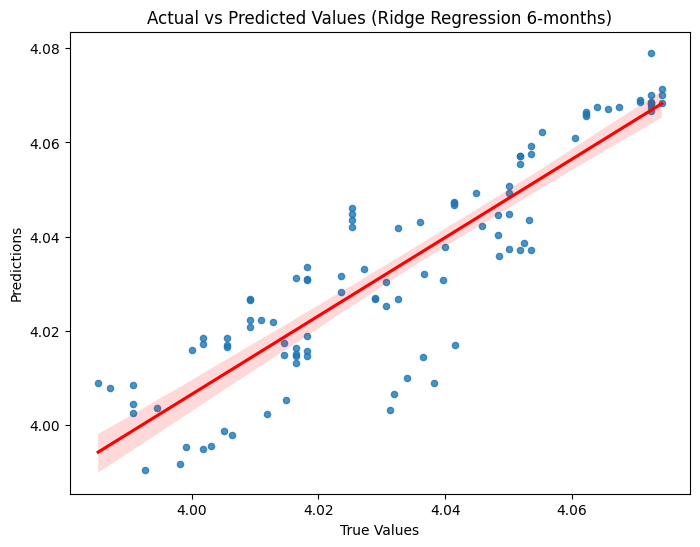

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (Ridge Regression 6-months)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


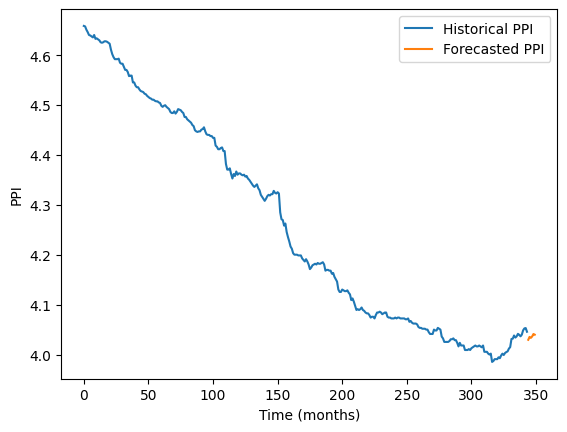

[[4.0296296 ]
 [4.0354931 ]
 [4.03348024]
 [4.03631805]
 [4.04120963]
 [4.03984863]]


In [37]:
n_months = 6
# Create an array of lagged PPI values for the next n_months
X = cdf_6M[['PPI_Lagged', 'Employees_Semis', 'Export_Semis', 'Import_Semis']].tail(n_months)
y_pred = regr.predict(X)

forecast_df = pd.DataFrame(data=y_pred.ravel(), columns=['PPI'])

forecast_index = pd.date_range(start=cdf_6M.index[-1], periods=6, freq='MS')
forecast_df.set_index(forecast_index, inplace=True)


# Plot the predicted PPI values
plt.plot(range(len(cdf_6M)), cdf_6M['PPI'], label='Historical PPI')
plt.plot(range(len(cdf_6M), len(cdf_6M)+n_months), forecast_df, label='Forecasted PPI')
plt.xlabel('Time (months)')
plt.ylabel('PPI')
plt.legend()
plt.show()

print(forecast_df.values,sep="\n")

**FORECAST 12 MONTHS**

In [38]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-12M.xlsx")

In [39]:
df.tail(5)

,Date,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
333,2022-09-01,4.039924,4.005058,4.402250,4.117410,4.051785,5.919700,3.808882,4.763882,0.409258,4.943070,4.586990
334,2022-10-01,4.048527,4.006369,4.393845,4.110874,4.055257,5.922382,3.811097,4.766438,0.391772,4.948050,4.596759
335,2022-11-01,4.052446,4.011886,4.490195,4.109233,4.058717,5.923453,3.817712,4.768139,0.382333,4.950177,4.601174
336,2022-12-01,4.053141,4.014941,4.686981,4.105944,4.062166,5.924523,3.824284,4.772378,0.375487,4.953006,4.601456
337,2023-01-01,4.045749,4.031334,4.949697,4.109233,4.072440,5.929855,3.837299,4.782479,0.351150,4.962145,4.599506


In [40]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [41]:
cdf_12M = df[[ 'PPI','PPI_Lagged', 'Export_Semis', 'RIW_Semis','IP_NoEnergy']]

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_12M) * 0.7)

# Split the data into training and testing sets
train = cdf_12M[:last_entry]
test = cdf_12M[last_entry:]

train_x = np.asanyarray(train.drop(['PPI'], axis=1))
train_y = np.asanyarray(train[['PPI']])
test_x = np.asanyarray(test.drop(['PPI'], axis=1))
test_y = np.asanyarray(test[['PPI']])

# Initialize best R2 score to a very small value
best_r2_score = -float('inf')
best_y_pred = -float('inf')
# Try different values of n_estimators
n_ridge_list = [0.01,0.05,0.1,1,10,100]

for n_ridge in n_ridge_list:
  regr = Ridge(alpha=n_ridge)

  regr.fit(train_x, train_y)
  # Make predictions on test set
  y_pred = regr.predict(test_x)

  # Calculate evaluation metrics
  mae = mean_absolute_error(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  r2 = r2_score(test_y, y_pred)



  # Check if current R2 score is better than the best so far
  if r2 > best_r2_score:
      best_r2_score = r2
      best_n_ridge = n_ridge
      best_y_pred = y_pred

  # Print evaluation metrics
  print(f'Linear Regression with {n_ridge} ridge')
  print('Intercept: %.8f' % regr.intercept_)
  print('Coefficients: ', regr.coef_)
  print('Linear Regression MAE:', mae)
  print('Linear Regression MSE:', mse)
  print('Linear Regression R2 score:', r2)
  print('\n')

#Train with the best Ridge
regr = Ridge(alpha=best_n_ridge)
regr.fit(train_x, train_y)
test_y_ = regr.predict(test_x)
print(f'Best Linear Regression with {best_n_ridge} ridge')
print('Linear Regression MAE:', mean_absolute_error(test_y, regr.predict(test_x)))
print('Linear Regression MSE:', mean_squared_error(test_y, regr.predict(test_x)))
print('Linear Regression R2 score:', best_r2_score)

Linear Regression with 0.01 ridge
Intercept: 0.28698354
Coefficients:  [[0.78385507 0.12043878 0.01568167 0.01619956]]
Linear Regression MAE: 0.011640760202684217
Linear Regression MSE: 0.0002877877412313479
Linear Regression R2 score: 0.5119850646964406


Linear Regression with 0.05 ridge
Intercept: 0.30743337
Coefficients:  [[0.72783409 0.15067572 0.02048992 0.0343736 ]]
Linear Regression MAE: 0.01149755594149813
Linear Regression MSE: 0.00024392654268179056
Linear Regression R2 score: 0.5863625203897035


Linear Regression with 0.1 ridge
Intercept: 0.35503411
Coefficients:  [[0.67321322 0.17843644 0.0269084  0.04741863]]
Linear Regression MAE: 0.012124591480371929
Linear Regression MSE: 0.0002364370538690209
Linear Regression R2 score: 0.5990627917173912


Linear Regression with 1 ridge
Intercept: 1.16455525
Coefficients:  [[0.37172776 0.28640181 0.10179913 0.03662274]]
Linear Regression MAE: 0.021527321952789752
Linear Regression MSE: 0.0007061674736815382
Linear Regression R2 scor

In [43]:
train_y_pred = regr.predict(train_x)
train_mape = np.mean(np.abs((train_y - train_y_pred) / train_y)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

test_mape = np.mean(np.abs((test_y - test_y_) / test_y)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

all_values = np.concatenate((test_y, test_y_), axis=1)
print(np.concatenate((test, all_values), axis=1))

Train MAPE: 0.37101768%
Test MAPE: 0.30127528%
[[4.07243973 4.08429423 4.15575319 0.38212824 4.62336859 4.07243973
  4.07568903]
 [4.07414185 4.08092154 4.15418456 0.37994215 4.62284899 4.07414185
  4.07305513]
 [4.07414185 4.08260931 4.13836145 0.40219309 4.62401549 4.07414185
  4.07202199]
 [4.07243973 4.08429423 4.13836145 0.40839415 4.62137616 4.07243973
  4.07319801]
 [4.07243973 4.08429423 4.13516656 0.41111578 4.6202903  4.07243973
  4.07264967]
 [4.07243973 4.07584109 4.12552018 0.42983246 4.61303815 4.07243973
  4.06539739]
 [4.07243973 4.07414185 4.12713439 0.44243971 4.61775171 4.07243973
  4.06510422]
 [4.0707347  4.07414185 4.130355   0.4462231  4.62695614 4.0707347
  4.06621717]
 [4.0707347  4.07243973 4.12713439 0.45685506 4.62596154 4.0707347
  4.06473552]
 [4.07243973 4.07243973 4.130355   0.4658701  4.62699821 4.07243973
  4.06560194]
 [4.06560209 4.07243973 4.130355   0.46045822 4.63143522 4.06560209
  4.06566671]
 [4.06731589 4.07414185 4.11740984 0.45615822 4.63245

In [44]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.37101768%
Test MAPE: 0.30127528%


In [45]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.075689,0.000798
1,4.074142,4.073055,0.000267
2,4.074142,4.072022,0.000520
3,4.072440,4.073198,0.000186
4,4.072440,4.072650,0.000052
...,...,...,...
97,4.039924,4.014509,0.006291
98,4.048527,4.014218,0.008474
99,4.052446,4.017595,0.008600
100,4.053141,4.018894,0.008449


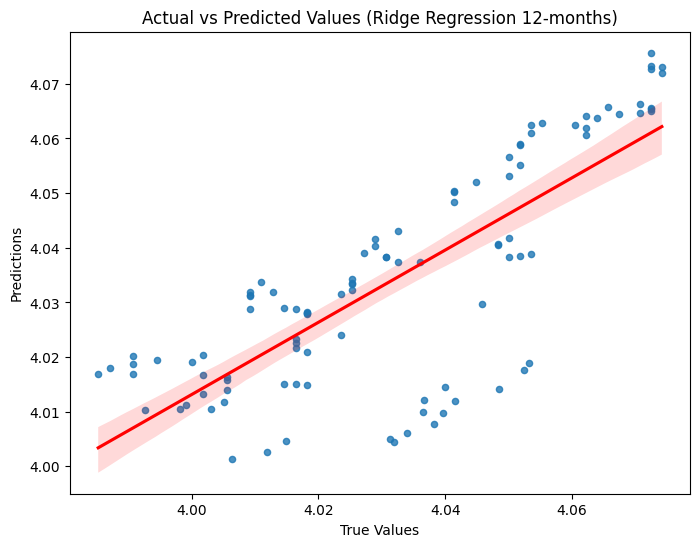

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (Ridge Regression 12-months)")
plt.show()

In [47]:
#CODE RUNNING CAREFUL WITH THE FEATURES
# n_months = 12
# # Create an array of lagged PPI values for the next n_months
# X = cdf_12M[['PPI_Lagged', 'Export_Semis', 'Import_Semis','Employees_Semis']].tail(n_months)
# y_pred = regr.predict(X)

# forecast_df = pd.DataFrame(data=y_pred.ravel(), columns=['PPI'])

# forecast_index = pd.date_range(start=cdf_12M.index[-1], periods=12, freq='MS')
# forecast_df.set_index(forecast_index, inplace=True)

# # Plot the predicted PPI values
# plt.plot(range(len(cdf_12M)), cdf_12M['PPI'], label='Historical PPI')
# plt.plot(range(len(cdf_12M), len(cdf_12M)+n_months), forecast_df, label='Forecasted PPI')
# plt.xlabel('Time (months)')
# plt.ylabel('PPI')
# plt.legend()
# plt.show()

# print(forecast_df.values,sep="\n")

**FORECAST FOR 24 MONTHS**

In [48]:
df = pd.read_excel("/content/drive/MyDrive/MBA/DataTables_Semis-Forecasting/DataTable_Semis-Forecasting-24M.xlsx")

In [49]:
df.tail(5)

,Date,PPI,PPI_Lagged,GPR,Export_Semis,Import_Semis,Employees_Semis,Export_NoSemis,Import_NoSemis,RIW_Semis,Export_CapitalGoods,IP_NoEnergy
321,2022-09-01,4.039924,4.001864,4.386733,4.112512,4.025352,5.900993,3.772761,4.746670,0.501502,4.916325,4.541618
322,2022-10-01,4.048527,3.985273,4.331827,4.112512,4.019980,5.901266,3.761200,4.748404,0.507841,4.916325,4.554317
323,2022-11-01,4.052446,3.987130,4.249459,4.112512,4.019980,5.898252,3.754199,4.749271,0.498044,4.914858,4.558176
324,2022-12-01,4.053141,3.990834,4.159934,4.112512,4.023564,5.900171,3.747148,4.751001,0.475551,4.916325,4.561883
325,2023-01-01,4.045749,3.990834,4.362087,4.112512,4.028917,5.902360,3.756538,4.753590,0.461089,4.920711,4.579043


In [50]:
df.columns

Index(['Date', 'PPI', 'PPI_Lagged', 'GPR', 'Export_Semis', 'Import_Semis',
       'Employees_Semis', 'Export_NoSemis', 'Import_NoSemis', 'RIW_Semis',
       'Export_CapitalGoods', 'IP_NoEnergy'],
      dtype='object')

In [51]:
cdf_24M = df[['PPI', 'PPI_Lagged','Export_Semis', 'Export_CapitalGoods','Employees_Semis','RIW_Semis']]

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the index of the last entry of your dataset
last_entry = int(len(cdf_24M) * 0.7)

# Split the data into training and testing sets
train = cdf_24M[:last_entry]
test = cdf_24M[last_entry:]

train_x = np.asanyarray(train.drop(['PPI'], axis=1))
train_y = np.asanyarray(train[['PPI']])
test_x = np.asanyarray(test.drop(['PPI'], axis=1))
test_y = np.asanyarray(test[['PPI']])

# Initialize best R2 score to a very small value
best_r2_score = -float('inf')
best_y_pred = -float('inf')
# Try different values of n_estimators
n_ridge_list = [0.01,0.05,0.1,1,10,100]

for n_ridge in n_ridge_list:
  regr = Ridge(alpha=n_ridge)

  regr.fit(train_x, train_y)
  # Make predictions on test set
  y_pred = regr.predict(test_x)

  # Calculate evaluation metrics
  mae = mean_absolute_error(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  r2 = r2_score(test_y, y_pred)



  # Check if current R2 score is better than the best so far
  if r2 > best_r2_score:
      best_r2_score = r2
      best_n_ridge = n_ridge
      best_y_pred = y_pred

  # Print evaluation metrics
  print(f'Linear Regression with {n_ridge} ridge')
  print('Intercept: %.8f' % regr.intercept_)
  print('Coefficients: ', regr.coef_)
  print('Linear Regression MAE:', mae)
  print('Linear Regression MSE:', mse)
  print('Linear Regression R2 score:', r2)
  print('\n')

#Train with the best Ridge
regr = Ridge(alpha=best_n_ridge)
regr.fit(train_x, train_y)
test_y_ = regr.predict(test_x)
print(f'Best Linear Regression with {best_n_ridge} ridge')
print('Linear Regression MAE:', mean_absolute_error(test_y, regr.predict(test_x)))
print('Linear Regression MSE:', mean_squared_error(test_y, regr.predict(test_x)))
print('Linear Regression R2 score:', best_r2_score)


Linear Regression with 0.01 ridge
Intercept: 7.19301181
Coefficients:  [[-1.40107897e-01  4.55981656e-01 -9.32620568e-01  9.34742458e-03
  -5.51157956e-04]]
Linear Regression MAE: 0.017939222236906093
Linear Regression MSE: 0.0007207953753718314
Linear Regression R2 score: -0.3322892812276361


Linear Regression with 0.05 ridge
Intercept: 4.62710051
Coefficients:  [[ 0.1471373   0.34961418 -0.57195554  0.02299333  0.01349541]]
Linear Regression MAE: 0.01637011344400185
Linear Regression MSE: 0.0005745252299848622
Linear Regression R2 score: -0.061929407231304356


Linear Regression with 0.1 ridge
Intercept: 3.69419336
Coefficients:  [[ 0.23640547  0.31691156 -0.4368814   0.03104225  0.02068093]]
Linear Regression MAE: 0.014941472371211269
Linear Regression MSE: 0.0004780426590445916
Linear Regression R2 score: 0.11640510972185614


Linear Regression with 1 ridge
Intercept: 2.17174521
Coefficients:  [[ 0.25286387  0.29223459 -0.16924212  0.07296197  0.0693106 ]]
Linear Regression MAE: 0

In [53]:
train_y_pred = regr.predict(train_x)
train_mape = np.mean(np.abs((train_y - train_y_pred) / train_y)) * 100
print("Train MAPE: {:.8f}%".format(train_mape))

test_mape = np.mean(np.abs((test_y - test_y_) / test_y)) * 100
print("Test MAPE: {:.8f}%".format(test_mape))

all_values = np.concatenate((test_y, test_y_), axis=1)
print(np.concatenate((test, all_values), axis=1))

Train MAPE: 0.42203052%
Test MAPE: 0.27820667%
[[4.07243973 4.07414185 4.14472077 4.822698   5.93780002 0.59144663
  4.07243973 4.07120274]
 [4.07243973 4.07584109 4.15575319 4.82911342 5.93595184 0.55675456
  4.07243973 4.07123133]
 [4.07243973 4.07584109 4.16355963 4.83230576 5.93171454 0.50222878
  4.07243973 4.06888399]
 [4.0707347  4.07243973 4.16200321 4.83150863 5.92852475 0.46279017
  4.0707347  4.06473773]
 [4.0707347  4.07923092 4.14313473 4.83150863 5.92745922 0.44108962
  4.0707347  4.05935913]
 [4.07243973 4.08429423 4.14313473 4.83150863 5.92665932 0.40786223
  4.07243973 4.05827809]
 [4.06560209 4.08429423 4.14154616 4.83150863 5.92825847 0.37857341
  4.06560209 4.05590051]
 [4.06731589 4.08597631 4.15731936 4.83310225 5.92612571 0.37843644
  4.06731589 4.06050051]
 [4.06388535 4.08429423 4.15575319 4.83150863 5.92612571 0.38212824
  4.06388535 4.06014307]
 [4.06216566 4.08092154 4.15418456 4.83230576 5.92692603 0.37994215
  4.06216566 4.0586038 ]
 [4.06216566 4.08260931

In [54]:
train_actual = train[['PPI']].reset_index(drop=True)
train_pred = pd.DataFrame(regr.predict(train_x), columns=['PPI_pred'])

# Create dataframes for actual and predicted values of test set
test_actual = test[['PPI']].reset_index(drop=True)
test_pred = pd.DataFrame(test_y_, columns=['PPI_pred'])

# Concatenate actual and predicted values for train and test sets
train_df = pd.concat([train_actual, train_pred], axis=1)
test_df = pd.concat([test_actual, test_pred], axis=1)

# Calculate MAPE for train and test sets separately
train_df['MAPE'] = np.abs(train_df['PPI'] - train_df['PPI_pred']) / train_df['PPI']
test_df['MAPE'] = np.abs(test_df['PPI'] - test_df['PPI_pred']) / test_df['PPI']

# Print train and test MAPE results
print("Train MAPE: {:.8%}".format(train_df['MAPE'].mean()))
print("Test MAPE: {:.8%}".format(test_df['MAPE'].mean()))

Train MAPE: 0.42203052%
Test MAPE: 0.27820667%


In [55]:
test_df

,PPI,PPI_pred,MAPE
0,4.072440,4.071203,0.000304
1,4.072440,4.071231,0.000297
2,4.072440,4.068884,0.000873
3,4.070735,4.064738,0.001473
4,4.070735,4.059359,0.002794
...,...,...,...
93,4.039924,4.018748,0.005241
94,4.048527,4.015013,0.008278
95,4.052446,4.014831,0.009282
96,4.053141,4.014101,0.009632


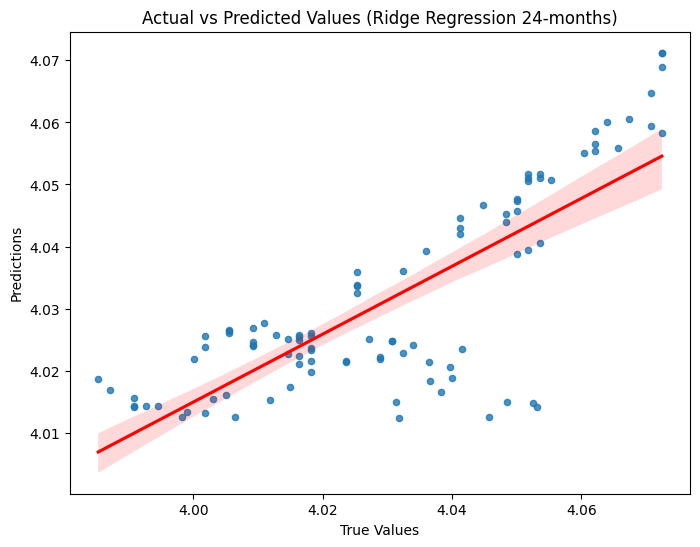

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot actual vs predicted values
sns.regplot(x=test_y, y=test_y_, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values (Ridge Regression 24-months)")
plt.show()

In [57]:
#CODE WORKING CAREFUL WITH FEATURES
# n_months = 24
# # Create an array of lagged PPI values for the next n_months
# X = cdf_24M[['PPI_Lagged','Export_Semis', 'Import_Semis','Employees_Semis','RIW_Semis']].tail(n_months)
# y_pred = regr.predict(X)

# forecast_df = pd.DataFrame(data=y_pred.ravel(), columns=['PPI'])

# forecast_index = pd.date_range(start=cdf_24M.index[-1], periods=24, freq='MS')
# forecast_df.set_index(forecast_index, inplace=True)

# # Plot the predicted PPI values
# plt.plot(range(len(cdf_24M)), cdf_24M['PPI'], label='Historical PPI')
# plt.plot(range(len(cdf_24M), len(cdf_24M)+n_months), forecast_df, label='Forecasted PPI')
# plt.xlabel('Time (months)')
# plt.ylabel('PPI')
# plt.legend()
# plt.show()

# print(forecast_df.values,sep="\n")

TESTING

In [58]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Set the index of the last entry of your dataset
# last_entry = int(len(cdf_6M) * 0.35)

# # Split the data into training and testing sets
# train = cdf_6M[:last_entry]
# test = cdf_6M[last_entry:]



# # Train the model using Ridge regression
# alpha = 0.05
# regr = Ridge(alpha=alpha)
# train_x = np.asanyarray(train.drop(['PPI'], axis=1))
# train_y = np.asanyarray(train[['PPI']])
# regr.fit(train_x, train_y)

# # The coefficients
# print ('Intercept: %.8f' % regr.intercept_)
# print ('Coefficients: ', regr.coef_)

# # Evaluate the model on the testing data
# test_x = np.asanyarray(test.drop(['PPI'], axis=1))
# test_y = np.asanyarray(test[['PPI']])
# test_y_ = regr.predict(test_x)

# print("Mean absolute error: {:.8f}".format(mean_absolute_error(test_y, test_y_)))
# print("Mean squared error: {:.8f}".format(mean_squared_error(test_y, test_y_)))
# print("R2-score: {:.8f}".format(r2_score(test_y, test_y_)))

In [59]:
# # Visualize the training data
# plt.scatter(train.PPI_FirstLag, train.PPI, color='blue')
# plt.xlabel("PPI First LAG")
# plt.ylabel("PPI")
# plt.show()
# # Plot the trained model
# plt.scatter(train.PPI_FirstLag, train.PPI, color='blue')
# plt.plot(train_x, regr.predict(train_x), '-r')
# plt.xlabel("PPI First LAG")
# plt.ylabel("PPI")